# Decision Tree Project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=421&path=diabetes.csv")

main_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Look at data in set

## Start Analyzing Data to see what we keep in our include_list

## Start train and test split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_df, test_df = train_test_split(main_df, test_size=0.4)

In [5]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
495,6,166,74,0,0,26.6,0.304,66,0
45,0,180,66,39,0,42.0,1.893,25,1
169,3,111,90,12,78,28.4,0.495,29,0
524,3,125,58,0,0,31.6,0.151,24,0
478,8,126,74,38,75,25.9,0.162,39,0
...,...,...,...,...,...,...,...,...,...
378,4,156,75,0,0,48.3,0.238,32,1
237,0,179,90,27,0,44.1,0.686,23,1
82,7,83,78,26,71,29.3,0.767,36,0
413,1,143,74,22,61,26.2,0.256,21,0


In [6]:
X_train = train_df.drop(columns=['Outcome'])
y_train = train_df['Outcome']

X_test = test_df.drop(columns=['Outcome'])
y_test = test_df['Outcome']

In [7]:
X_train.shape

(460, 8)

In [8]:
y_train.shape

(460,)

In [9]:
X_test.shape

(308, 8)

In [10]:
y_test.shape

(308,)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt_model = DecisionTreeClassifier(max_depth = 5)   # ← create the model object
dt_model.fit(X_train, y_train)        # ← now you can fit it

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [14]:
def model_evaluator(X_matrix, y_target, model):
    preds = model.predict(X_matrix)
    
    print(f"Accuracy score: {accuracy_score(y_true = y_target, y_pred = preds)}")
    print(f"Precision score: {precision_score(y_true = y_target, y_pred = preds)}")
    print(f"Recall score: {recall_score(y_true = y_target, y_pred = preds)}")
    print(f"Confusion matrix: \n{confusion_matrix(y_true = y_target, y_pred = preds)}")
    print(f"Classification report: \n{classification_report(y_true = y_target, y_pred = preds)}")

In [15]:
model_evaluator(X_train, y_train, dt_model)

Accuracy score: 0.8826086956521739
Precision score: 0.8613138686131386
Recall score: 0.7712418300653595
Confusion matrix: 
[[288  19]
 [ 35 118]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       307
           1       0.86      0.77      0.81       153

    accuracy                           0.88       460
   macro avg       0.88      0.85      0.86       460
weighted avg       0.88      0.88      0.88       460



In [16]:
model_evaluator(X_test, y_test, dt_model)

Accuracy score: 0.7435064935064936
Precision score: 0.6875
Recall score: 0.5739130434782609
Confusion matrix: 
[[163  30]
 [ 49  66]]
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       193
           1       0.69      0.57      0.63       115

    accuracy                           0.74       308
   macro avg       0.73      0.71      0.72       308
weighted avg       0.74      0.74      0.74       308



In [ ]:
# what are the parameters of this Decision Tree?
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# how deep our decision tree is, this tells us it is 5 splits deep
dt_model.get_depth()

5

In [19]:
from sklearn.tree import plot_tree

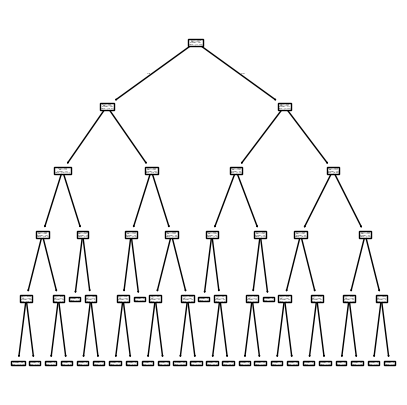

In [ ]:
# the ';' will give us info instead of information when plotting in matplotlib
plt.figure(figsize=(5, 5))
plot_tree(dt_model);

In [33]:
hyperparameters_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 25],
    'min_samples_leaf': [2, 5, 10]
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
gridsearch_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=hyperparameters_dict,
                                scoring='precision',
                                verbose=3)

In [25]:
gridsearch_model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 5, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [26]:
model_evaluator(X_train, y_train, gridsearch_model)

Accuracy score: 0.7956521739130434
Precision score: 0.6629834254143646
Recall score: 0.7843137254901961
Confusion matrix: 
[[246  61]
 [ 33 120]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       307
           1       0.66      0.78      0.72       153

    accuracy                           0.80       460
   macro avg       0.77      0.79      0.78       460
weighted avg       0.81      0.80      0.80       460



In [27]:
gridsearch_model.best_estimator_

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,25
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_train.value_counts()

Outcome
0    307
1    153
Name: count, dtype: int64

In [29]:
y_train.value_counts(normalize=True)

Outcome
0    0.667391
1    0.332609
Name: proportion, dtype: float64

In [30]:
gridsearch_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 25}

In [31]:
# percentage of each predicted probabilty - ask gpt
gridsearch_model.predict_proba(X_test)[:, 1]

array([0.        , 0.11111111, 0.11111111, 0.7826087 , 0.        ,
       0.        , 0.29411765, 0.2       , 0.        , 0.27272727,
       0.27272727, 0.11111111, 1.        , 0.7826087 , 0.50617284,
       0.50617284, 0.        , 0.2       , 0.        , 1.        ,
       0.27272727, 0.50617284, 1.        , 0.        , 0.        ,
       0.50617284, 0.        , 0.        , 0.27272727, 1.        ,
       0.27272727, 0.29411765, 0.        , 0.27272727, 0.        ,
       0.2       , 0.65      , 0.50617284, 0.        , 0.11111111,
       0.        , 0.50617284, 0.        , 0.2       , 1.        ,
       0.29411765, 0.7826087 , 0.50617284, 0.        , 0.50617284,
       0.60869565, 0.27272727, 0.60869565, 0.27272727, 0.1       ,
       0.50617284, 0.        , 0.7826087 , 0.11111111, 0.        ,
       0.60869565, 1.        , 0.        , 0.        , 0.50617284,
       0.50617284, 0.27272727, 0.50617284, 0.60869565, 0.        ,
       0.        , 0.65      , 0.27272727, 0.        , 0.2    